# Basic image stack processing (with corrections)

---
## 1) Open image stack using scikit-image
Here, we will learn how to open a stack of images using the scikit-image (or skimage) library.

- **1.1** - Import the `io` module from skimage :

In [23]:
from skimage import io

- **1.2** - Define a path toward `Ctrl_Endocad-GFP(6-12-13)_23_StackCrop.tif` located in the `BD_EpiCellSeg/DataSet` shared folder : 

In [24]:
ROOT_PATH = 'C:/Users/Benoit Dehapiot/BD_EpiCellSeg/DataSet/' # modify your path according to where is located the shared folder on your computer
STACK_NAME = 'Ctrl_Endocad-GFP(6-12-13)_23_StackCrop.tif'

- **1.3** - Combine ROOT_PATH and STACK_NAME to obtain the full path toward the stack :

In [25]:
stack_path = (ROOT_PATH+STACK_NAME)
print(stack_path)

C:/Users/Benoit Dehapiot/BD_EpiCellSeg/DataSet/Ctrl_Endocad-GFP(6-12-13)_23_StackCrop.tif


- **1.4** - Open stack using the `imread` function of the `io` module :

In [26]:
stack = io.imread(stack_path)

---
## 2) Get stack dimension
Here, we will get the number of dimensions of the stack and then measure the size of the stack along each of these dimensions.  

- **2.1** - Get number of dimension using `.ndim` attribute :

In [27]:
print(stack.ndim)

3


- **2.2** - Get size of each dimensions using `.shape` attribute :

In [28]:
print(stack.shape)

(50, 550, 900)


- **2.3** - Assign variables to each dimension sizes :

In [29]:
nT = stack.shape[0] # get Stack size in time
nY = stack.shape[1] # get Stack size in y
nX = stack.shape[2] # get Stack size in x
print(nT, nY, nX)

50 550 900


---
## 3) Extract and diplay images from stack
Here, we will extract selected images from stack and display it using the matplotlib library.

- **3.1** - Import `matplotlib.pyplot` module as `plt` :

In [30]:
import matplotlib.pyplot as plt

- **3.2** - Extract first image of the stack :

In [31]:
first_image = stack[0,:,:] # index 0 return to the first element of the array

- **3.3** - Display first image using `imshow` function of the `plt` module :

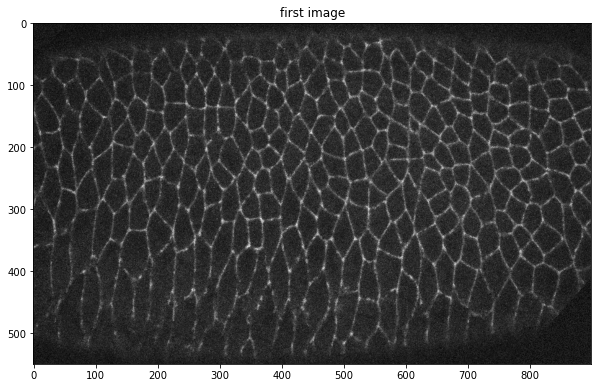

In [32]:
f, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(first_image, cmap='gray') # display first_image
ax.title.set_text('first image') # add title
plt.show()

<span style="color:red"> **- Exercice 1: Display first and last image side by side :**

In [33]:
# Find a solution, see 3.3

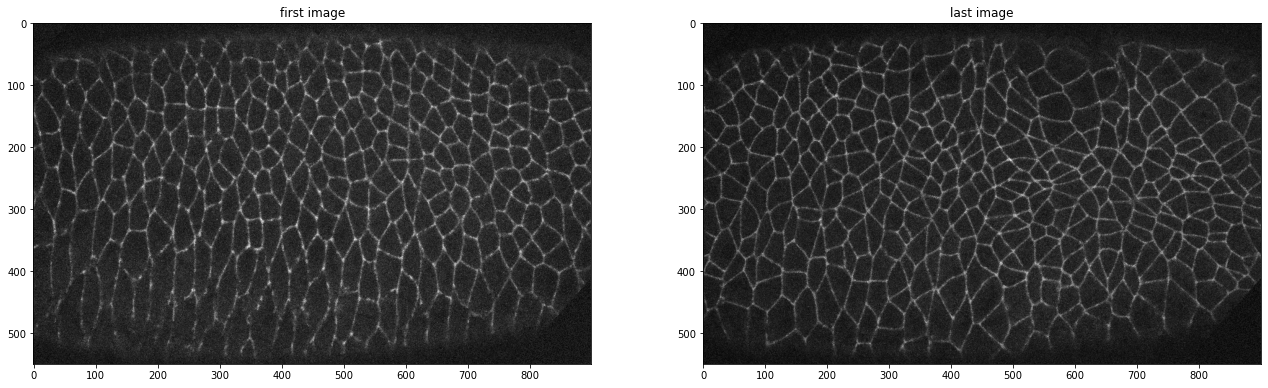

In [34]:
# Proposed solution

# Extract first and last image of the stack
first_image = stack[0,:,:] # index 0 return to the first element of the array
last_image = stack[-1,:,:] # index -1 return to the last element of the array

# Display first_image and last_images side by side (use figsize=(22,22))
f, ax = plt.subplots(1,2,figsize=(22,22))
ax[0].imshow(first_image, cmap='gray') # display first_image
ax[1].imshow(last_image, cmap='gray') # display last_image 
ax[0].title.set_text('first image') # add title (first_image)
ax[1].title.set_text('last image') # add title (last_image_image)
plt.show()

---
## 4) Resize stack
Here, we will reduce the size of the x and y dimensions to increase the computation speed.

- **4.1** - Import `resize` function from the `skimage.transform` module :

In [35]:
from skimage.transform import resize

- **4.2** - Define a resize factor and resize the x and y dimensions by this factor (do not resize the time dimension) : 

In [36]:
RSIZE_FACTOR = 2
stack_rsize = resize(stack,(nT//1, nY//RSIZE_FACTOR, nX//RSIZE_FACTOR), preserve_range=True, anti_aliasing=True) 

<span style="color:red"> **- Exercice 2: Assign variables to each new dimension sizes :**

In [37]:
# Find a solution, see 2.3

In [38]:
# Proposed solution

nY_rsize = stack_rsize.shape[1] # get Stack size in y
nX_rsize = stack_rsize.shape[2] # get Stack size in x
print(nY_rsize, nX_rsize)

275 450


<span style="color:red"> **- Exercice 3: Extract cropped region of** `stack` **and** `stack_rsize` **and display it side by side :**

In [39]:
# Find a solution, see 3.3 and Exercice 1

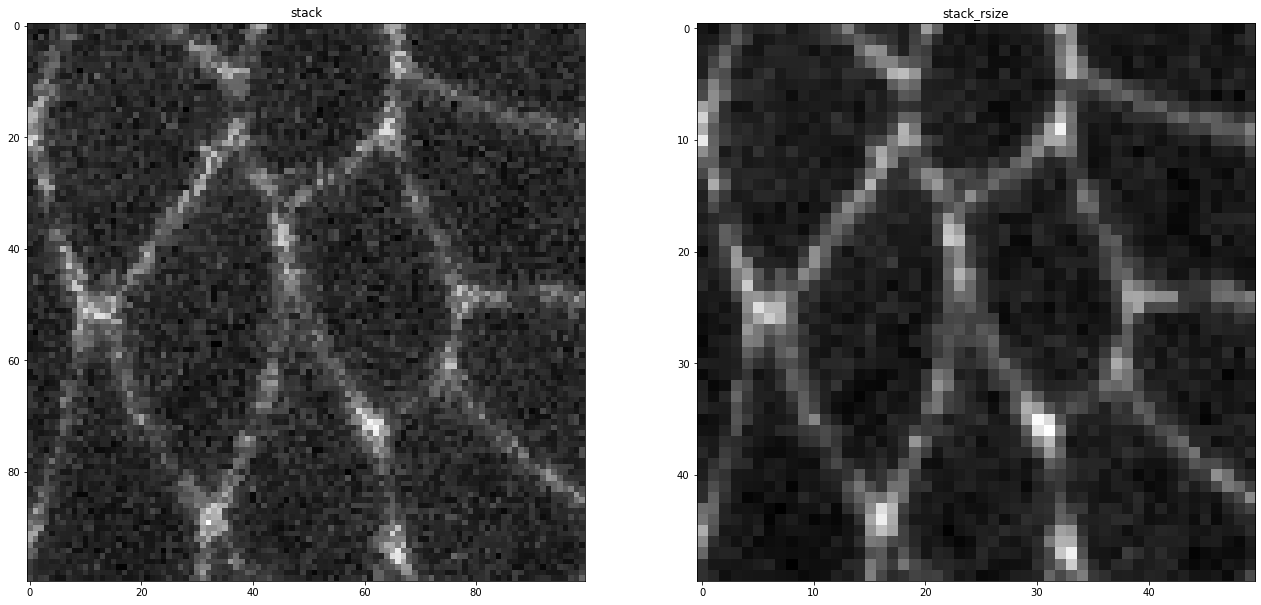

In [48]:
# Proposed solution

# Extract cropped region of stack and stack_rsize
stack_crop = stack[0,200:300,400:500] # get stack from: y 200 to 300 and x 400 to 500 
stack_rsize_crop = stack_rsize[0,100:150,200:250] # get stack_rsize from: y 100 to 150 and x 200 to 250 (same as stack but multiplied by RSIZE_FACTOR) 

# Display stack_crop and stack_rsize_crop side by side (use figsize=(22,22))
f, ax = plt.subplots(1,2,figsize=(22,22))
ax[0].imshow(stack_crop, cmap='gray')
ax[1].imshow(stack_rsize_crop, cmap='gray') 
ax[0].title.set_text('stack')
ax[1].title.set_text('stack_rsize')
plt.show()

---
## 5) Save resized stack
Here, we will learn how to save a stack of images using the scikit-image (or skimage) library.

<span style="color:red"> **- Exercice 4: Define a path to save** `stack_rsize` **as** `Ctrl_Endocad-GFP(6-12-13)_23_StackCrop_rsize.tif` **in the** `BD_EpiCellSeg/DataSet` **shared folder :**

In [41]:
# Find a solution, see 1.2

In [42]:
# Proposed solution

# Here we combine ROOT_PATH and STACK_NAME minus the 4 last character ('.tif') that we combine with a string '_rsize.tif' 
stack_path_rsize = (ROOT_PATH+STACK_NAME[0:-4]+'_rsize.tif')
print(stack_path_rsize)

C:/Users/Benoit Dehapiot/BD_EpiCellSeg/DataSet/Ctrl_Endocad-GFP(6-12-13)_23_StackCrop_rsize.tif


- **5.1** - Convert stack_rsize from float64 to uint16 using the `astype()` method :

In [43]:
stack_rsize = stack_rsize.astype('uint16')

- **5.2** - Save stack_rsize using the `imsave` function of the `io` module :

In [44]:
io.imsave(stack_path_rsize, stack_rsize, check_contrast=False)

---
## 6) Batch processing
Here, we will resize all stacks present in the `BD_EpiCellSeg/DataSet` shared folder at once

- **6.1** - Import the `os` module :

In [ ]:
import os 

- **6.2** - Get folder content list using the `listdir` method of the `os` module :

In [50]:
dir_list = os.listdir(ROOT_PATH)
print(dir_list)

['Ctrl_Endocad-GFP(6-12-13)_23_StackCrop.tif', 'Ctrl_Endocad-GFP(6-12-13)_23_StackCrop_rsize.tif', 'eve_Endocad-GFP(22-3-15)_04_StackCrop.tif', 'torso_Endocad-GFP(13-12-13)_04_StackCrop.tif']


- **6.3** - Remove `dir_list` names that contain 'rsize' :

In [52]:
# Loop through dir_list and check wether file names contain 'rsize'
# If this is the case remove the name from the list
for stack_name in dir_list:
    if 'rsize' in stack_name: 
        dir_list.remove(stack_name)
print(dir_list)        

['Ctrl_Endocad-GFP(6-12-13)_23_StackCrop.tif', 'eve_Endocad-GFP(22-3-15)_04_StackCrop.tif', 'torso_Endocad-GFP(13-12-13)_04_StackCrop.tif']


<span style="color:red"> **- Exercice 5: Loop through** `dir_list` **and resize/save all stacks contained in** `BD_EpiCellSeg/DataSet` **shared folder :**

In [ ]:
# Find a solution, see 1.3, 1.4, 2.3, 4.2, Exercice 4, 5.1 and 5.2

In [ ]:
# Proposed solution

for stack_name in dir_list:
    
    # Get "opening" path
    stack_path = (ROOT_PATH+stack_name)
    
    # Open stack
    stack = io.imread(stack_path)
    
    # Get dimension sizes
    nT = stack.shape[0]
    nY = stack.shape[1]
    nX = stack.shape[2]
    
    # Resize stack
    stack_rsize = resize(stack,(nT//1, nY//RSIZE_FACTOR, nX//RSIZE_FACTOR), preserve_range=True, anti_aliasing=True)     
    
    # Get "saving" path
    stack_path_rsize = (ROOT_PATH+stack_name[0:-4]+'_rsize.tif')
    
    # Convert to uint16
    stack_rsize = stack_rsize.astype('uint16')
    
    # Save stack_rsize
    io.imsave(stack_path_rsize, stack_rsize, check_contrast=False)